# Martingalas

Recordemos que un proceso estocástico a tiempo discreto $\{X_n\}_{n \in \mathbb{N}}$ es una martingalas cuando para cada $n \in \mathbb{N}$ se cumple que

$$\mathbb{E}(X_{n+1} | X_0 , X_1, ..., X_n) = X_n$$

Ahora veamos algunas situaciones donde podemos simular martingalas.

### Simulación de Estrategias de Juego

Supongamos que estamos apostando en un casino y nuestro capital al tiempo $n$ está representado por $X_n$. Pensemos en la estrategia de juego donde se avienta una moneda y si sale águila ganamos 1 y si no, perdemos 1. Esta es una caminata aleatoria, usaremos el código de [CM2_EhrenfestyRuina](https://github.com/eliasegn/ProcesosI/blob/main/CM2_EhrenfestyRuina.ipynb) teníamos para visualizar trayectorias, en este caso de la ruina del jugador sin tiempo de absorción.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

class Ruina1:

  # Definimos los datos iniciales
  def __init__(self, iter, p, d, k_0):
    self.k_0 = k_0 # El capital inicial
    self.iter = iter # El número de iteraciones
    self.p = p # La proba de éxito
    self.d = d # El monto máximo
    self.caminata_aleatoria = [k_0]

  # Función para simular la caminata
  def simular(self):
    for i in range(1, self.iter):
        b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
        self.caminata_aleatoria.append(self.caminata_aleatoria[-1] + b)
    return self.caminata_aleatoria

  # Función para imprimir la cadena
  def __str__(self):
    return str(self.caminata_aleatoria)

  # Función para graficar la cadena
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(1, self.iter + 1), 'c': self.caminata_aleatoria})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['c'], color='darkslategray', linewidth=1)
    plt.grid()
    plt.title(f'Ruina del Jugador con p = {self.p}', fontsize=16)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Valor del Proceso', fontsize=12)
    plt.show()


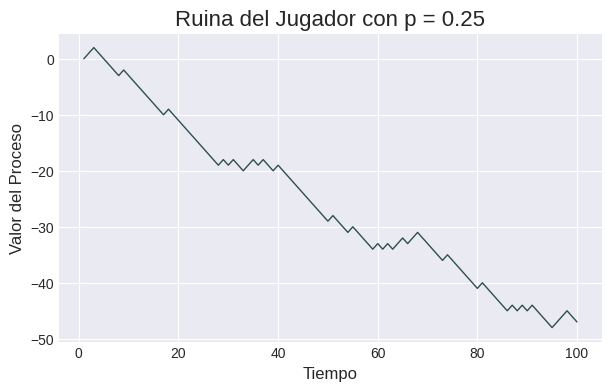

In [2]:
# Ejemplos de Ruina del Jugador sin absorción
ruina1 = Ruina1(100, 0.25, 100, 0)
ruina1.simular()
ruina1.plot()

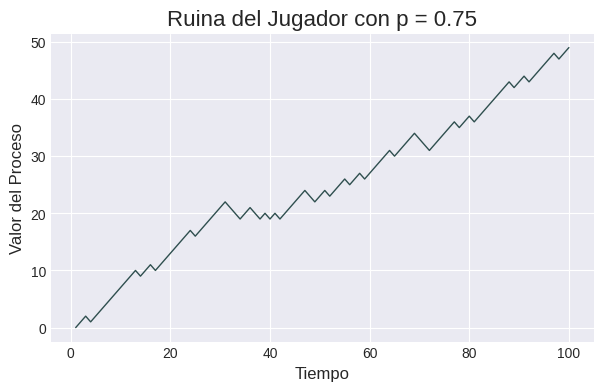

In [3]:
ruina2 = Ruina1(100, 0.75, 100, 0)
ruina2.simular()
ruina2.plot()


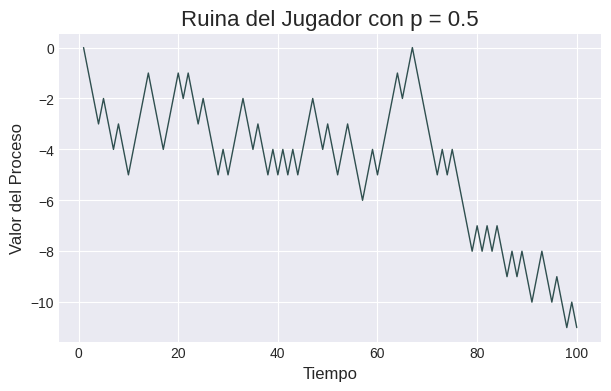

In [4]:
ruina3 = Ruina1(100, 0.5, 100, 0)
ruina3.simular()
ruina3.plot()

Sabemos que cuando $p = \frac{1}{2}$, el proceso es una martingala, podemos notar que el comportamiento es diferente en los otros casos.

Cuando $p = \frac{1}{4}$ claramente pierdes mucho dinero, al contrario de cuando $p = \frac{3}{4}$, donde ganas mucho. En promedio, cuando $p =\frac{1}{2}$ no esperas ni ganar ni perder.

Sabemos que si $M_n = X_n - n(2p-1)$, entonces este nuevo proceso cumple con ser martingalas. Veamos algunas de sus trayectorias para diferentes valores de $p$

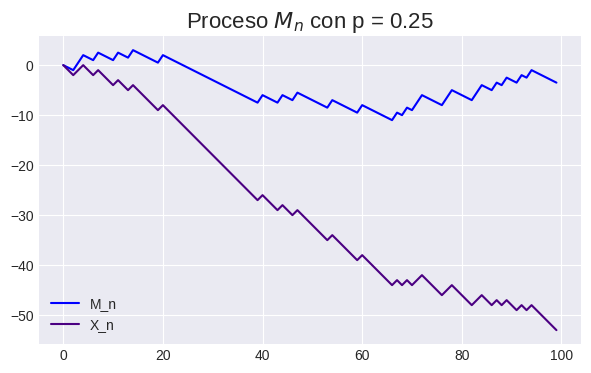

In [5]:
# Simulamos el juego
ruina4 = Ruina1(100, 0.25, 100, 0)
ruina4_xn = ruina4.simular()
ruina4_xn = np.array(ruina4_xn)
ruina4_mn = np.zeros(len(ruina4_xn))

# Simulamos el nuevo proceso que sí es martingala
for j in range(len(ruina4_xn)):
  ruina4_mn[j] = ruina4_xn[j] - j * (2 * 0.25 - 1)

# Graficamos ambos procesos
plt.figure(figsize=(7, 4))
plt.plot(ruina4_mn, color='blue', label = f'M_n')
plt.plot(ruina4_xn, color = 'indigo', label = f'X_n')
plt.legend()
plt.grid()
plt.title(f'Proceso $M_n$ con p = {0.25}', fontsize=16)
plt.show()

Como podemos ver, el nuevo proceso corrije al anterior, ya que al sumarle una cantidad positiva, se corrije que el jugador solo pierde. Vemos que en las trayectorias, el proceso $\{M_n\}_{n \in \mathbb{N}}$ termina aproximadamente en 0, lo que quiere decir que si este fuera el capital del jugador, este no esperaría perder ni ganar nada, tal como cuando el juego es simétrico.

Veamos otro caso.

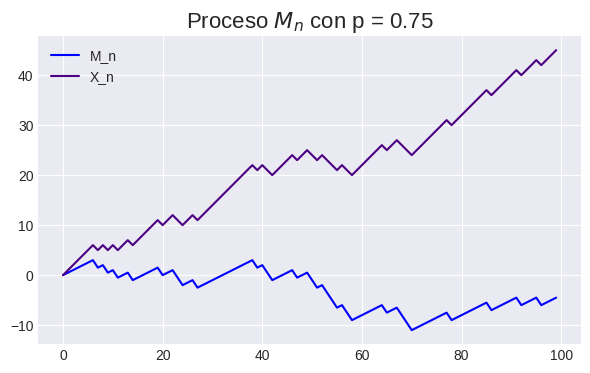

In [6]:
# Simulamos el Juego
ruina5 = Ruina1(100, 0.75, 100, 0)
ruina5_xn = ruina5.simular()
ruina5_xn = np.array(ruina5_xn)
ruina5_mn = np.zeros(len(ruina5_xn))

# Simulamos el nuevo proceso que sí es martingala
for j in range(len(ruina5_xn)):
  ruina5_mn[j] = ruina5_xn[j] - j * (2 * 0.75 - 1)

# Graficamos ambos procesos
plt.figure(figsize=(7, 4))
plt.plot(ruina5_mn, color='blue', label = f'M_n')
plt.plot(ruina5_xn, color = 'indigo', label = f'X_n')
plt.legend()
plt.grid()
plt.title(f'Proceso $M_n$ con p = {0.75}', fontsize=16)
plt.show()

Notamos lo mismo, el nuevo proceso tiene esperanza constante, lo cual es consecuencia de que es una martingala.

### Doblar la Apuesta

Ahora pensemos en la estrategia en que cada vez que perdemos, doblamos la apuesta. Esto podemos escribirlo de la siguiente forma:

$$
\left\{\begin{array}{l}
X_0=0 \\
X_n:=X_{n-1}+2^{n-1} Y_n \quad \forall n \in \mathbb{N}
\end{array}\right.
$$

donde

$$
Y_n=\left\{\begin{array}{lll}
-1 & \text { con probabilidad } & 1 / 2 \\
1 & \text { con probabilidad } & 1 / 2
\end{array}\right.
$$

Sabemos que este proceso es una martingala. Veamos algunas de sus trayectorias.

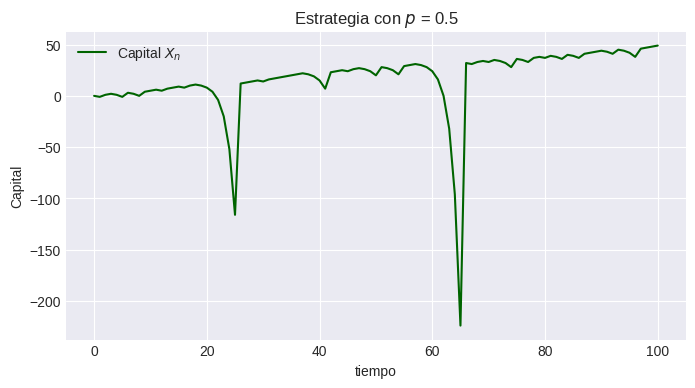

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
# Parámetros
N = 100               # número de jugadas
p = 0.5              # probabilidad de ganar
capital = [0]        # capital acumulado (inicia en 0)
apuesta = 1          # apuesta inicial
apuesta_actual = apuesta

# Simulación
for _ in range(N):
    resultado = np.random.rand() # Simulamos la apuesta
    if resultado < p:  # gana
        capital.append(capital[-1] + apuesta_actual)
        apuesta_actual = apuesta  # reinicia apuesta
    else:  # pierde
        capital.append(capital[-1] - apuesta_actual)
        apuesta_actual *= 2  # dobla apuesta

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(capital, label='Capital $X_n$', color='darkgreen')
plt.title(f"Estrategia con $p$ = {p}")
plt.xlabel("tiempo")
plt.ylabel("Capital")
plt.grid()
plt.legend()
plt.show()


Ahora haremos una Clase para representar esta apuesta

In [8]:
class DoblarApuesta:

  def __init__(self, N, p, apuesta):
    '''
    N = número de jugadas
    p = probabilidad de ganar
    apuesta = apuesta inicial
    '''
    self.N = N
    self.p = p
    self.apuesta = apuesta
    self.capital = [0]
    self.apuesta_actual = apuesta

  def simular(self):
    # Iteramos por cada momento de la apuesta
    for _ in range(N):
      resultado = np.random.rand() # Simulamos la apuesta
      if resultado < self.p:  # gana
          self.capital.append(self.capital[-1] + self.apuesta_actual)
          self.apuesta_actual = self.apuesta  # reinicia apuesta
      else:  # pierde
          self.capital.append(self.capital[-1] - self.apuesta_actual)
          self.apuesta_actual *= 2  # dobla apuesta
    return self.capital

  def plot(self):
    # Graficamos el proceso
    plt.figure(figsize=(8, 4))
    plt.plot(self.capital, label='Capital $X_n$', color='darkgreen')
    plt.title(f"Estrategia con $p$ = {self.p}")
    plt.xlabel("tiempo")
    plt.ylabel("Capital")
    plt.grid()
    plt.legend()
    plt.show()

  def __str__(self):
    # Ver el proceso como lista
    return str(self.capital)

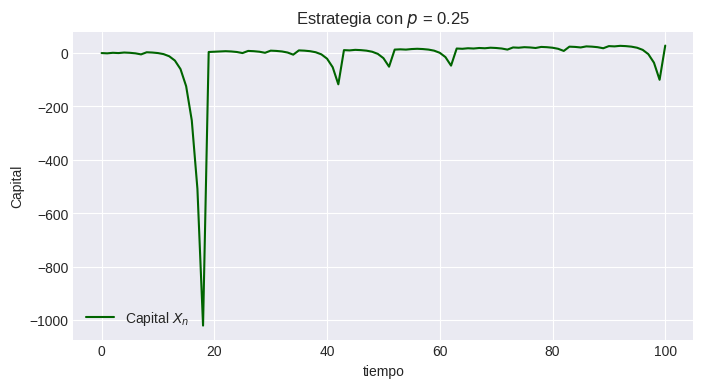

In [9]:
# Ejemplos de Doblar la Apuesta
np.random.seed(68)
doblar2 = DoblarApuesta(10, 0.25, 1)
doblar2.simular()
doblar2.plot()

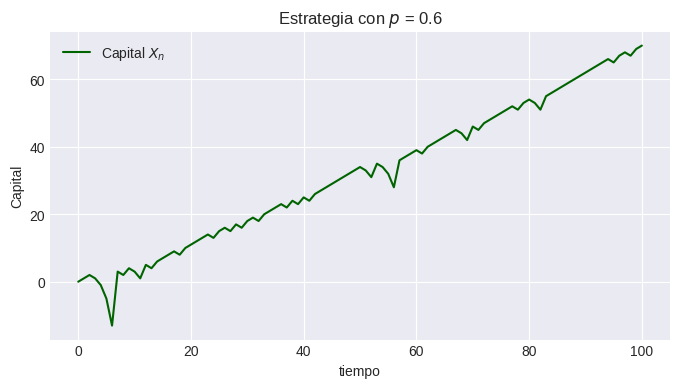

In [10]:
doblar3 = DoblarApuesta(10, 0.6, 1)
doblar3.simular()
doblar3.plot()

¡Este proceso también es una martingala! Aunque tiene subidas suaves, las bajadas violentan hacen que en promedio tu ganancia final sea cero.

### Modelo Binomial

Pensemos que $S_n$ es el precio de un activo financiero al tiempo $n$ y está dado por:

$$S_{n+1}= \begin{cases}u \cdot S_n & \text { con probabilidad } p \\ d \cdot S_n & \text { con probabilidad } 1-p\end{cases}$$

y $r$ representa una tasa de interés y $d<1+r<u$. Sabemos que si $p = \frac{1+r-d}{u-d}$, entonces el proceso de precios descontados dado por:

$$ M_n = \frac{S_n}{{(1+r)}^{n}}$$

es una martingala. A dicha probabilidad $p$ se le conoce como la probabilidad neutral al riesgo, la cual se estudia en cursos sobre productos financieros derivados.

In [11]:
# Definimos los parámetros de ejemplo
d = 0.8
r = 0.3
u = 1.5
p = (1 + r - d) / (u - d) # Calculamos la proba neutral al riesgo
print(f'La probabilidad neutral al riesgo es {p}')

La probabilidad neutral al riesgo es 0.7142857142857143


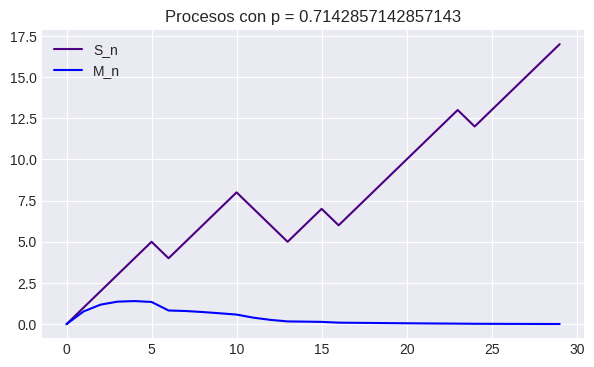

In [12]:
# Simulamos el proceso original
Sn1 = Ruina1(30, p, 100, 0)
procesoSn1 = Sn1.simular()

# Simulamos el proceso de precios descontados
procesoMn1 = np.zeros(len(procesoSn1))
for j in range(len(procesoSn1)):
  procesoMn1[j] = procesoSn1[j] / (1 + r) ** j

# Graficamos
plt.figure(figsize=(7, 4))
plt.plot(procesoSn1, color = 'indigo', label = f'S_n')
plt.plot(procesoMn1, color='blue', label = f'M_n')
plt.title(f'Procesos con p = {p}')
plt.legend()
plt.grid()
plt.show()

Ahora haremos una clase para representar el modelo binomial

In [13]:
class ModeloBinomial:

  def __init__(self, d, r, u, iter, capital_inicial, max):
    '''
    d : factor de pérdida
    r : tasa de interés
    u : factor de subida
    iter : número de iteraciones
    capital_inicial : capital inicial
    max : máximo capital
    '''
    self.d = d
    self.r = r
    self.u = u
    self.iter = iter
    self.capital_inicial = capital_inicial
    self.max = max
    self.p = (1 + r - d) / (u - d)
    self.Sn = None
    self.Mn = [capital_inicial]

  def simular(self):
    if not d < 1+r < u: # Verificamos que se cumpla la condición
      raise ValueError("d debe ser menor que 1+r y mayor que u")
    ruina = Ruina1(self.iter, self.p, self.max, self.capital_inicial)
    self.Sn = ruina.simular() # Generamos proceso original
    for j in range(len(self.Sn)): # Simulamos precios descontados
      self.Mn.append(self.Sn[j] / (1 + self.r) ** j)
    return self.Mn

  # Graficamos ambos procesos
  def plot(self):
    plt.figure(figsize=(7, 4))
    plt.plot(self.Mn, color='blue', label = f'M_n')
    plt.plot(self.Sn, color = 'indigo', label = f'S_n')
    plt.plot()
    plt.title(f'Procesos con p = {self.p}')
    plt.legend()
    plt.grid()
    plt.show()

  def __str__(self):
    # Devolvemos los precios descontados como lista
    return str(self.Mn)


Probemos con el ejemplo que teníamos

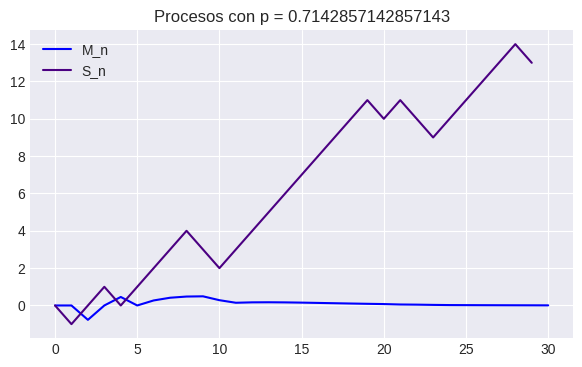

In [14]:
# Ejemplos del Modelo Binomial
mbinom1 = ModeloBinomial(0.8, 0.3, 1.5, 30, 0, 100)
mbinom1.simular()
mbinom1.plot()

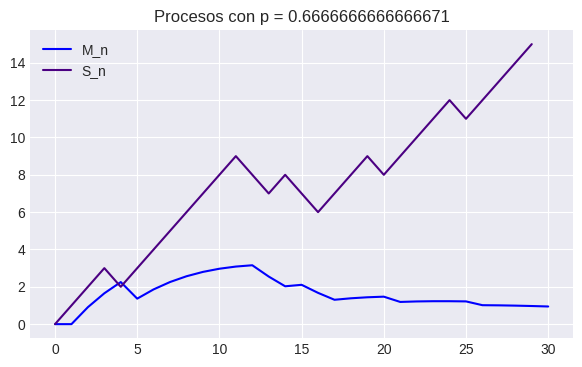

In [15]:
mbionm2 = ModeloBinomial(0.9, 0.1, 1.2, 30, 0, 1000)
mbionm2.simular()
mbionm2.plot()

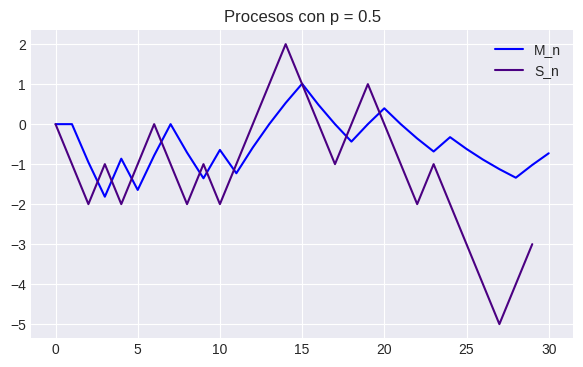

In [16]:
mbinom3 = ModeloBinomial(1, 0.05, 1.1, 30, 0, 1000)
mbinom3.simular()
mbinom3.plot()

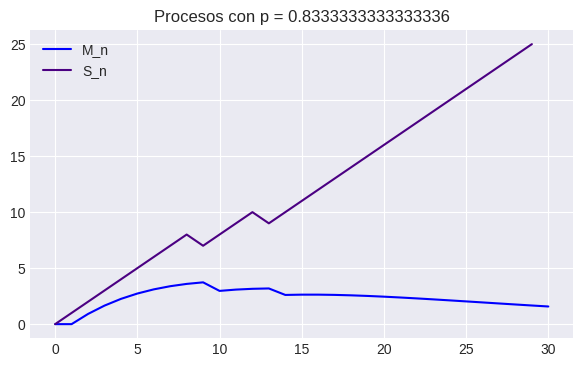

In [17]:
mbinom = ModeloBinomial(0.6, 0.1, 1.2, 30, 0, 1000)
mbinom.simular()
mbinom.plot()

¿Cómo afectan los valores de $u$, $r$ y $d$ al proceso?